In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#Antes de mudar formatos

# SEATS __________________________________________________
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

# FUEL TYPE __________________________________________________
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print()
print(valores_unicos_fuel_type)

# KMS __________________________________________________
#remove kms from kms_driven
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
# Remove , and blanks from 'kms_driven'
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER 
# #convert to bhp__________________________________________________
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Convert not NaN to float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power



# Calculando a moda para 'owner_type'
moda_owner_type = df['owner_type'].mode()[0]

# Preenchendo os valores nulos com a moda calculada
df['owner_type'].fillna(moda_owner_type, inplace=True)


# Check
unique_values = df['owner_type'].unique()
print()
print(unique_values)



# INSURANCE __________________________________________________
#Delet "insurance" 
df['insurance'] = df['insurance'].str.replace('insurance', '')

#Assign value to blank lines
df['insurance'].fillna('No Insurance', inplace=True)

#Blank space on "Third Party" lines
df['insurance'] = df['insurance'].str.replace('Third Party ', 'Third Party')

#Remove integer values
df = df[~df['insurance'].astype(str).str.isnumeric()]

#MILEAGE
#assign value to blank lines
df['mileage'] = df['mileage'].fillna(0)

df = df[df['mileage'].notna()]
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))  # Encontrar números (com ou sem ponto decimal)

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40  # Converter de km/kg para kmpl

        consumo_correto.append(valor)

df['mileage'] = consumo_correto




Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:

['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']

['First Owner' 'Third Owner' 'Second Owner' 'Fifth Owner' 'Fourth Owner']


In [4]:
#FullName ______________________________________

#ANO
# Extract the year and create a new column
df['ano'] = df['full_name'].str.extract(r'(\d{4})')

# Display the resulting DataFrame
print(df['ano'])

#MARCA
# Extract the first word after the year and create a new column
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+)')

# Print the resulting DataFrame
print(df['marca'])

#MODELO
# Get everything that comes after "marca"
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s\w+\s(.+)')

# Print the resulting DataFrame
print(df['modelo'])

0        2019
1        2018
2        2015
3        2021
4        2019
         ... 
13951    2021
13952    2017
13953    2017
13954    2017
13955    2015
Name: ano, Length: 13948, dtype: object
0           Tata
1          Honda
2          Honda
3           Tata
4         Maruti
          ...   
13951        Kia
13952    Hyundai
13953      Skoda
13954     Maruti
13955      Honda
Name: marca, Length: 13948, dtype: object
0                                        Tiago XZ Plus
1                                       WR-V i-VTEC VX
2                                       City i VTEC SV
3        New Safari XZA Plus Adventure Edition AT BSVI
4                                  Baleno 1.2 CVT Zeta
                             ...                      
13951                                 Carnival Premium
13952                          i20 1.2 Magna Executive
13953                      Rapid 1.5 TDI Ambition BSIV
13954                                Vitara Brezza ZDi
13955                      

In [5]:
contagem_nulos = df.isnull().sum()

print(contagem_nulos)

full_name              0
registered_year       54
engine_capacity        9
insurance              0
transmission_type      0
kms_driven             3
owner_type             0
fuel_type              0
max_power             89
seats                  0
mileage                0
body_type              0
city                   0
resale_price_Lakh      0
ano                    0
marca                  0
modelo               399
dtype: int64


In [6]:
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)

Distinct full names with blank body_type:


In [7]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'body_type': 'string',
    'mileage': float,
})

In [8]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                     float64
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca                string[python]
modelo               string[python]
dtype: object


In [9]:
#Delet blanks or NAN 

# MARCA __________________________________________________
df = df.dropna(subset=['marca'])
# MODELO __________________________________________________
df = df.dropna(subset=['modelo'])

In [10]:
import pandas as pd

# Calculando a média para 'kms_driven' e 'max_power'
media_kms = df['kms_driven'].mean()
media_max_power = df['max_power'].mean()

# Preenchendo os valores nulos com as médias calculadas
df['kms_driven'].fillna(media_kms, inplace=True)
df['max_power'].fillna(media_max_power, inplace=True)


In [11]:
import pandas as pd
import numpy as np

# Supondo que 'df' é o seu DataFrame contendo a coluna 'max_power'
max_power_unique = df['max_power'].unique()

# Em seguida, vamos definir os limites dos intervalos com base nesses valores únicos
limites = [min(max_power_unique)]  # Inclui o valor mínimo inicial

# Dividir os valores em intervalos
num_intervalos = 6  # Número de intervalos desejados
step = (max(max_power_unique) - min(max_power_unique)) / num_intervalos  # Tamanho do intervalo

# Criar os limites dos intervalos
for i in range(1, num_intervalos):
    limites.append(min(max_power_unique) + step * i)

# Adicionar o valor máximo final como infinito positivo
limites.append(np.inf)

# Rótulos para os intervalos
rotulos = [f'{round(limites[i], 2)}-{round(limites[i+1], 2)} bhp' for i in range(len(limites) - 1)]

# Usar pd.cut para criar os grupos
df['max_power_group'] = pd.cut(df['max_power'], bins=limites, labels=rotulos, right=False)





In [12]:
import pandas as pd
import numpy as np

# Supondo que 'df' é o seu DataFrame contendo a coluna 'max_power'
max_power_unique = df['kms_driven'].unique()

# Em seguida, vamos definir os limites dos intervalos com base nesses valores únicos
limites = [min(max_power_unique)]  # Inclui o valor mínimo inicial

# Dividir os valores em intervalos
num_intervalos = 6  # Número de intervalos desejados
step = (max(max_power_unique) - min(max_power_unique)) / num_intervalos  # Tamanho do intervalo

# Criar os limites dos intervalos
for i in range(1, num_intervalos):
    limites.append(min(max_power_unique) + step * i)

# Adicionar o valor máximo final como infinito positivo
limites.append(np.inf)

# Rótulos para os intervalos
rotulos = [f'{round(limites[i], 2)}-{round(limites[i+1], 2)} KMS' for i in range(len(limites) - 1)]

# Usar pd.cut para criar os grupos
df['kms_group'] = pd.cut(df['kms_driven'], bins=limites, labels=rotulos, right=False)

In [41]:
unique_max_power = df['engine_capacity_group'].unique()
print(unique_max_power)


['999.67-1999.33 cc', '1999.33-2999.0 cc', '0.0-999.67 cc', NaN, '2999.0-3998.67 cc', '3998.67-4998.33 cc', '4998.33-inf cc']
Categories (6, object): ['0.0-999.67 cc' < '999.67-1999.33 cc' < '1999.33-2999.0 cc' < '2999.0-3998.67 cc' < '3998.67-4998.33 cc' < '4998.33-inf cc']


In [40]:
# Contagem de linhas para cada valor diferente em kms_group
counts = df['engine_capacity_group'].value_counts()

# Exibir as contagens
print(counts)


engine_capacity_group
999.67-1999.33 cc     10134
0.0-999.67 cc          2300
1999.33-2999.0 cc      1059
2999.0-3998.67 cc        31
3998.67-4998.33 cc       10
4998.33-inf cc            6
Name: count, dtype: int64


In [13]:
import pandas as pd
import numpy as np

# Supondo que 'df' é o seu DataFrame contendo a coluna 'max_power'
max_power_unique = df['engine_capacity'].unique()

# Em seguida, vamos definir os limites dos intervalos com base nesses valores únicos
limites = [min(max_power_unique)]  # Inclui o valor mínimo inicial

# Dividir os valores em intervalos
num_intervalos = 6  # Número de intervalos desejados
step = (max(max_power_unique) - min(max_power_unique)) / num_intervalos  # Tamanho do intervalo

# Criar os limites dos intervalos
for i in range(1, num_intervalos):
    limites.append(min(max_power_unique) + step * i)

# Adicionar o valor máximo final como infinito positivo
limites.append(np.inf)

# Rótulos para os intervalos
rotulos = [f'{round(limites[i], 2)}-{round(limites[i+1], 2)} cc' for i in range(len(limites) - 1)]

# Usar pd.cut para criar os grupos
df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)

In [14]:


# groups marca

limites = [0, 10, 30, df['resale_price_Lakh'].max()]
rotulos = ['baixa', 'media', 'alta']

df['categoria_marca'] = pd.cut(df.groupby('marca')['resale_price_Lakh'].transform('mean'), bins=limites, labels=rotulos, right=False)



print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [15]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

fuel_types = df['fuel_type']
n_docs = len(df)
idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column 
df['id_fuel_type'] = df['fuel_type'].map(idf)


print(df)


____________________FUEL TYPE_____________________
         Petrol: 0.1803754522320382
         Diesel: 0.5154317288858208
            CNG: 1.5255258776637812
       Electric: 2.450666005398799
            LPG: 2.7701794067567933
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954     

In [16]:
# categoria_marca __________________________________________________

fuel_types = df['categoria_marca']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("categoria_marca".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_categoria_marca'] = df['categoria_marca'].map(idf)

print(df)

_________________categoria_marca__________________
          baixa: 0.07393701106368088
           alta: 1.5107309609993511
          media: 0.8999282159428821
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
1395

In [17]:
# engine_capacity_group __________________________________________________

fuel_types = df['engine_capacity_group']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("engine_capacity_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_engine_capacity_group'] = df['engine_capacity_group'].map(idf)

print(df)

______________engine_capacity_group_______________
999.67-1999.33 cc: 0.12608348974535877
1999.33-2999.0 cc: 1.106601377509616
  0.0-999.67 cc: 0.7699906241057428
            nan: 4.131907242774386
2999.0-3998.67 cc: 2.62675726445448
3998.67-4998.33 cc: 3.0905145576161615
 4998.33-inf cc: 3.2868092027601294
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953  

In [18]:
# kms_driven __________________________________________________

fuel_types = df['kms_group']

n_docs = len(df)

idf = {}

# Uniqes
unique_fuel_types = fuel_types.drop_duplicates()

print("kms_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_kms_group'] = df['kms_group'].map(idf)

print(df)

____________________kms_group_____________________
300.0-200250.0 KMS: 0.0007057527481532866
200250.0-400200.0 KMS: 2.8766347376710804
800100.0-1000050.0 KMS: 3.6547859880547238
600150.0-800100.0 KMS: 3.830877247110405
400200.0-600150.0 KMS: 3.6547859880547238
1000050.0-inf KMS: 3.830877247110405
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             

In [19]:
# Max power __________________________________________________

fuel_types = df['max_power_group']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("max_power_group".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types) 
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_max_power_group'] = df['max_power_group'].map(idf)

print(df)

_________________max_power_group__________________
25.4-113.17 bhp: 0.1461665017243117
113.17-200.93 bhp: 0.5760875597131951
200.93-288.7 bhp: 1.7739723957739324
288.7-376.47 bhp: 2.5637055187073914
 464.23-inf bhp: 3.3537559923907425
376.47-464.23 bhp: 3.0905145576161615
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI 

In [20]:
# OWNER TYPE __________________________________________________

owner_types = df['owner_type']
n_docs = len(df)

idf = {}
# Uniques
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types) 
    idf[owner_type] = np.log10(n_docs / (k + 1))  

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')
# Create new column 
df['id_owner_type'] = df['owner_type'].map(idf)

print(df)

    First Owner: 0.15122226841107161
    Third Owner: 1.3544804203850749
   Second Owner: 0.6204249541483848
    Fifth Owner: 2.5521236461575763
   Fourth Owner: 2.110717943704448
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi    

In [21]:
# INSURANCE __________________________________________________

insurance = df['insurance']
n_docs = len(df)
idf = {}

# Uniques
unique_insurance = insurance.drop_duplicates()

for insurance in unique_insurance:
    k = sum(insurance in row for row in df['insurance'])  
    idf[insurance] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for insurance, value in idf.items():
    print(f'{insurance:>15}: {value:>10}')

# Create new column 
df['id_insurance'] = df['insurance'].map(idf)


    Third Party: 0.2549392753418014
       Zero Dep: 1.3103937143696132
  Comprehensive: 0.4479601120228741
  Not Available: 1.414236739772124
   No Insurance: 3.3537559923907425


In [22]:
# CITY __________________________________________________

city= df['city']
n_docs = len(df)
idf = {}

# Uniques
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  
    idf[city] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Create new column 
df['id_city'] = df['city'].map(idf)

           Pune: 1.0924931235982491
         Jaipur: 1.2812610075913198
         Mumbai: 0.9253511986753568
        Kolkata: 1.1719124044459701
          Delhi: 0.7696133048101551
      Bangalore: 0.8694561530439567
      Hyderabad: 1.0267378147750545
        Chennai: 1.1241594647736464
        Gurgaon: 1.2228863885632302
     Chandigarh: 1.5928311439816096
      Ahmedabad: 1.1119605610955439
        Lucknow: 1.499449950589662
           Agra: 1.879054211794493


In [23]:
# MODELO _____________________________________

modelos = df['modelo']
n_docs = len(df)
idf = {}

# Uniques
unique_modelos = modelos.unique()

for modelo in unique_modelos:
    k = sum(modelo == val for val in modelos)  
    idf[modelo] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

# Create new column 
df['id_modelos'] = df['modelo'].map(idf)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [24]:
#BODY TYPE __________________

body_type = df['body_type']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['body_type']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_body_type'] = df['body_type'].map(idf)

print(df)

      Hatchback: 0.3628993718306124
            SUV: 0.6003006108416642
          Sedan: 0.5783883026254167
            MUV: 1.3494346186081
       Minivans: 2.2868092027601294
          Coupe: 3.2868092027601294
         Pickup: 3.0527259967267613
          Wagon: 3.6547859880547238
   Convertibles: 3.6547859880547238
           Cars: 3.4329372384383676
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i2

In [25]:
# Transmissao _____________________________________

transmissao = df['transmission_type']

n_docs = len(df)


transmissao_counts = transmissao.value_counts()

idf = {}

for tipo_transmissao, count in transmissao_counts.items():
    idf[tipo_transmissao] = np.log10(n_docs / (count + 1))  #+1 to avoid division by zero

# Create new column 
df['id_transmissao'] = df['transmission_type'].map(idf)


print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [26]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'id_categoria_marca': float,
})

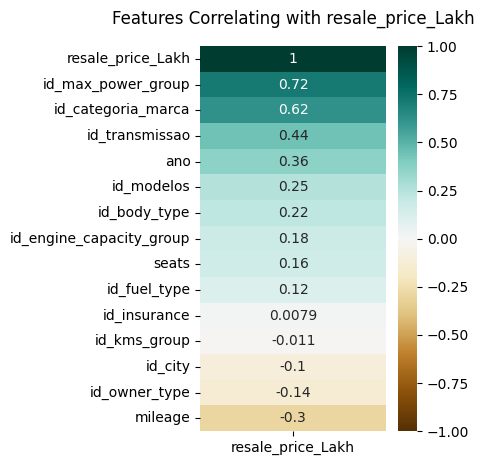

In [27]:
#correlation  

# Select columns
columns_of_interest = ['id_transmissao', 'id_body_type','id_modelos','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [28]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'mileage': float,
    'id_fuel_type': float,
    'id_categoria_marca': float,
    'id_engine_capacity_group': float,
    'id_kms_group': float,
    'id_max_power_group': float,
    'id_owner_type': float,
    'id_insurance': float,
    'id_city': float,
    'id_modelos': float,
    'id_body_type': float,
    'id_transmissao': float,

})

In [29]:
#Export
#Not the target
colunas_selecionadas = ['id_transmissao','transmission_type','body_type','id_body_type','modelo','id_modelos','marca','id_categoria_marca','ano','city','id_city','insurance','id_insurance','seats','engine_capacity','engine_capacity_group','id_engine_capacity_group','fuel_type','id_fuel_type','kms_driven','kms_group','id_kms_group','max_power','max_power_group','id_max_power_group','owner_type','id_owner_type','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todascenarioRafa.csv', index=False)

In [39]:
#Export
#Not the target
colunas_selecionadas = ['id_body_type','id_categoria_marca','ano','id_city','id_insurance', 'id_transmissao','seats','mileage','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('Xcenario2Rafa.csv', index=False)
   

In [31]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)


Data type by column:
full_name                           object
registered_year                     object
engine_capacity                    float64
insurance                           object
transmission_type                   object
kms_driven                         float64
owner_type                          object
fuel_type                           object
max_power                          float64
seats                              float64
mileage                            float64
body_type                   string[python]
city                                object
resale_price_Lakh                  float64
ano                                float64
marca                       string[python]
modelo                      string[python]
max_power_group                   category
kms_group                         category
engine_capacity_group             category
categoria_marca                   category
id_fuel_type                       float64
id_categoria_marca               